In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [115]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions 
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [116]:
#loading dataset
diabetes=pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [117]:
#printing first 5 rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Basic EDA and Statistics Analysis**

In [118]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [119]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The Question creeping out of this summary
Can minimum value of below listed columns be zero (0)?
On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose
BloodPressure
SkinThickness
Insulin
BMI

**Its better to replace all zeros with nan sice after that counting them would be eaiser and zeros need to be replaced with suitable values**

In [120]:
diabetes_copy=diabetes.copy(deep=True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**To fill these Nan values the data distribution needs to be understood**

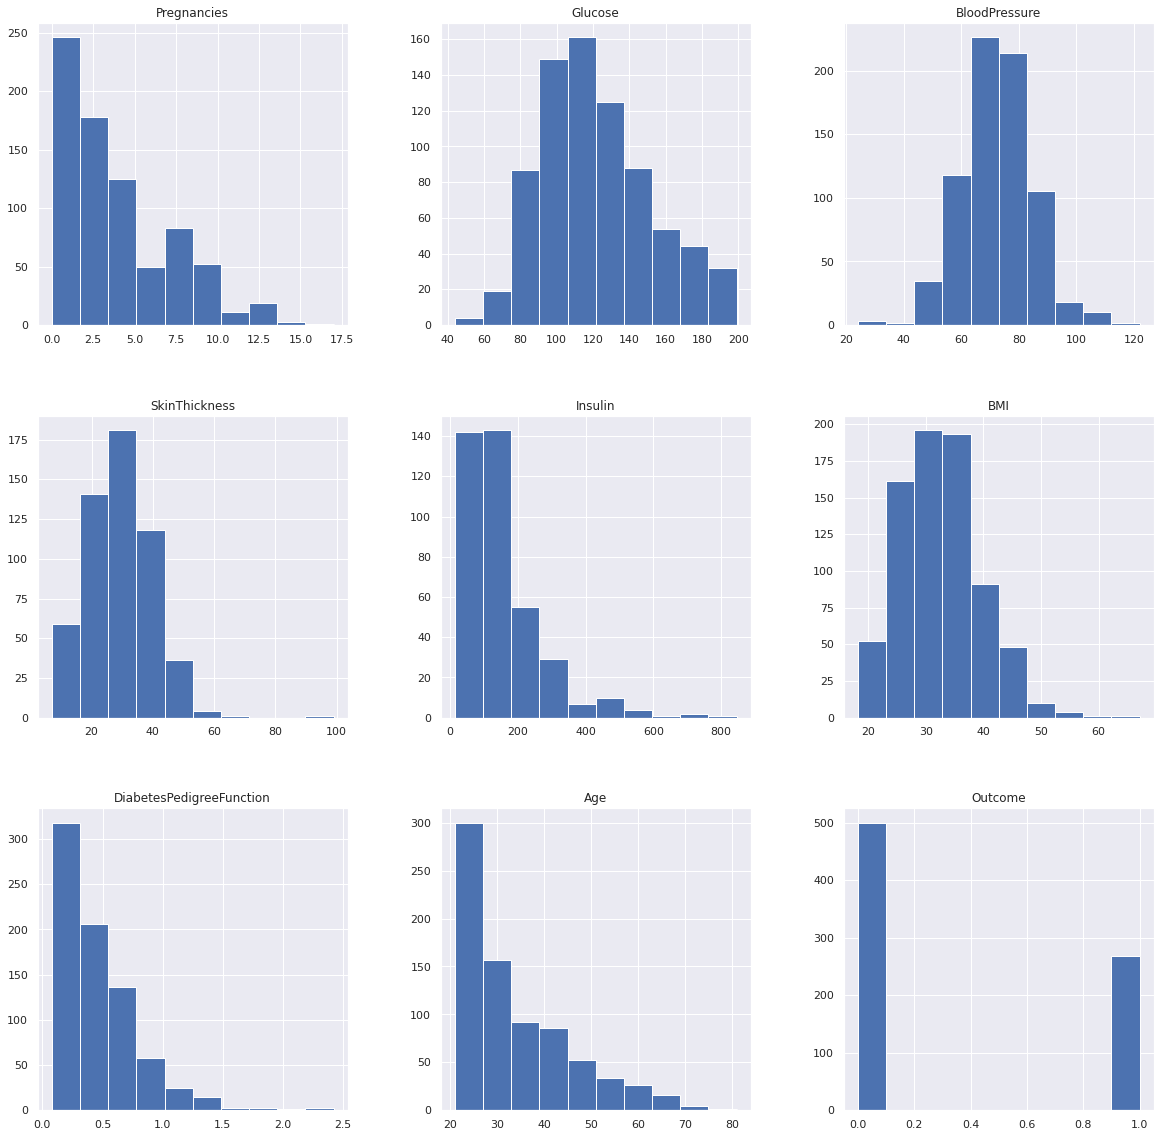

In [121]:
p=diabetes_copy.hist(figsize=(20,20))

**Aiming to impute nan values for the columns in accordance with their distribution**

In [122]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(),inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(),inplace=True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].mean(),inplace=True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].mean(),inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].sum(),inplace=True)

**Ploting after Nan removal**

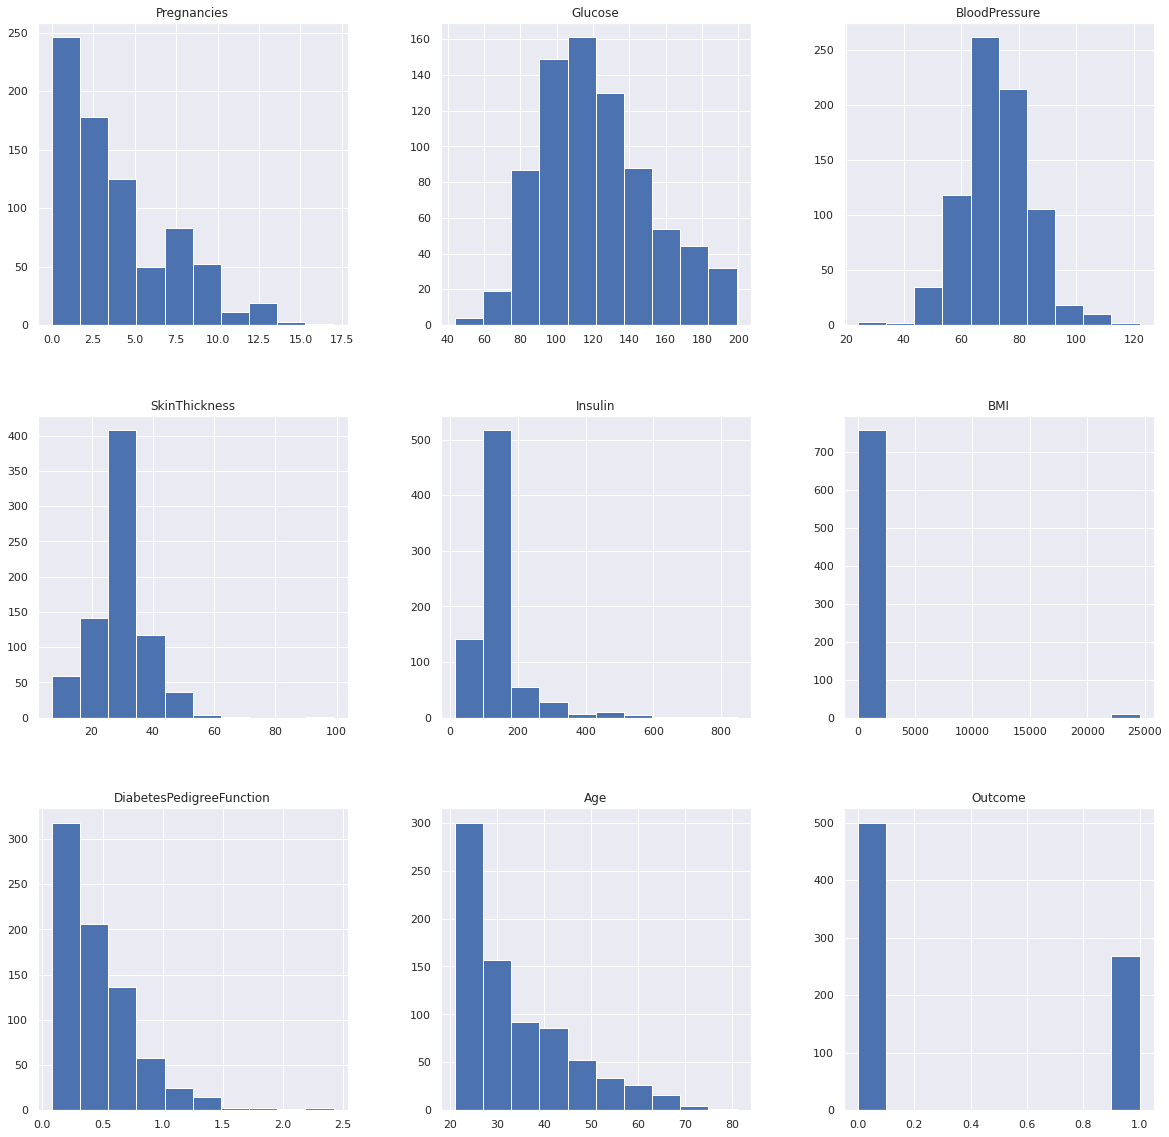

In [123]:
p=diabetes_copy.hist(figsize=(20,20))

In [124]:
diabetes.shape

(768, 9)

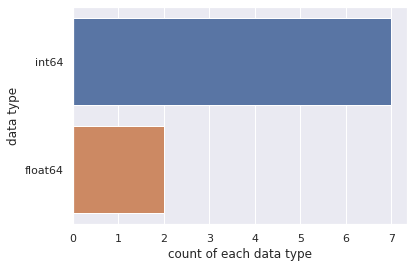

In [125]:
sns.countplot(y=diabetes.dtypes,data=diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data type")
plt.show()

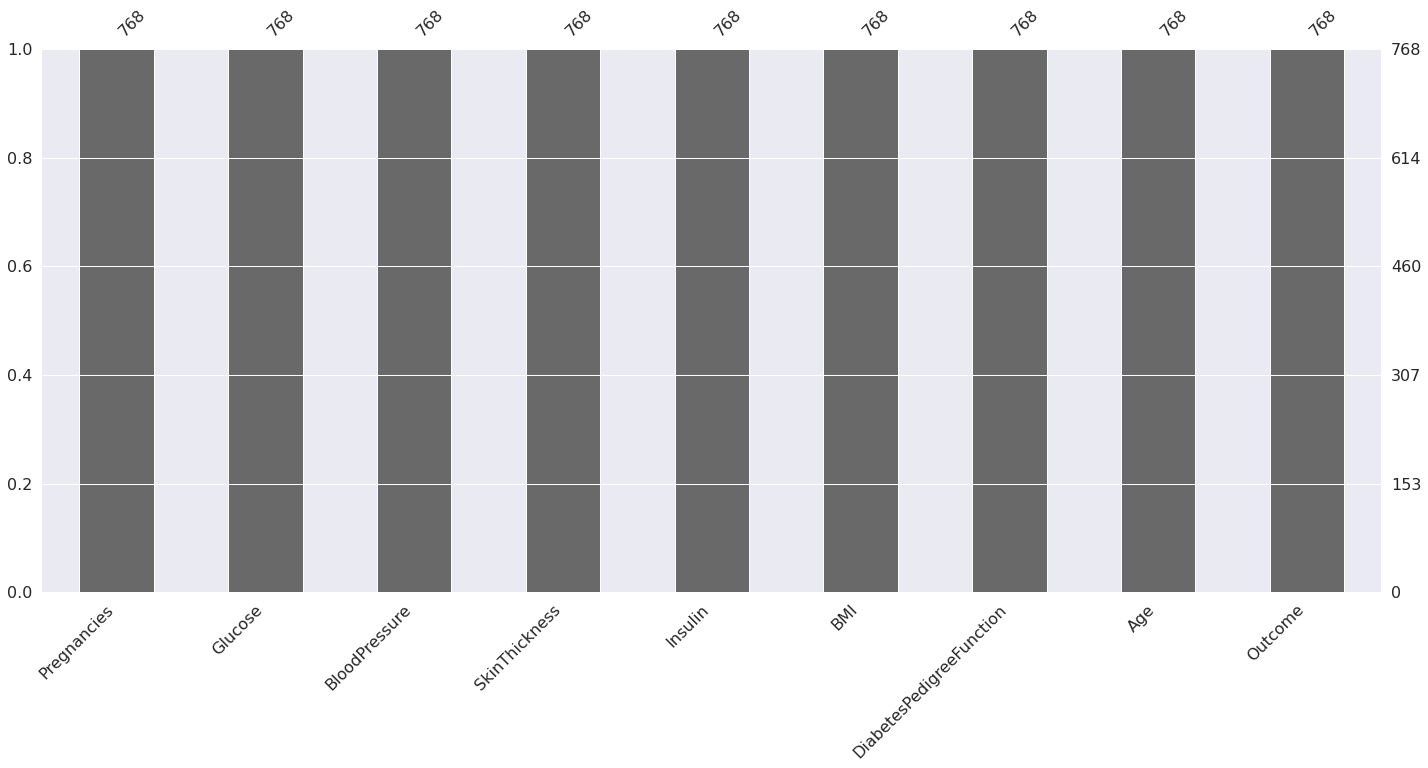

In [126]:
##null count analysis
import missingno as msno
p=msno.bar(diabetes)

0    500
1    268
Name: Outcome, dtype: int64


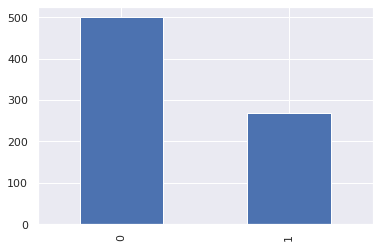

In [127]:
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=diabetes["Outcome"].map(lambda x:color_wheel.get(x+1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")

**The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients **

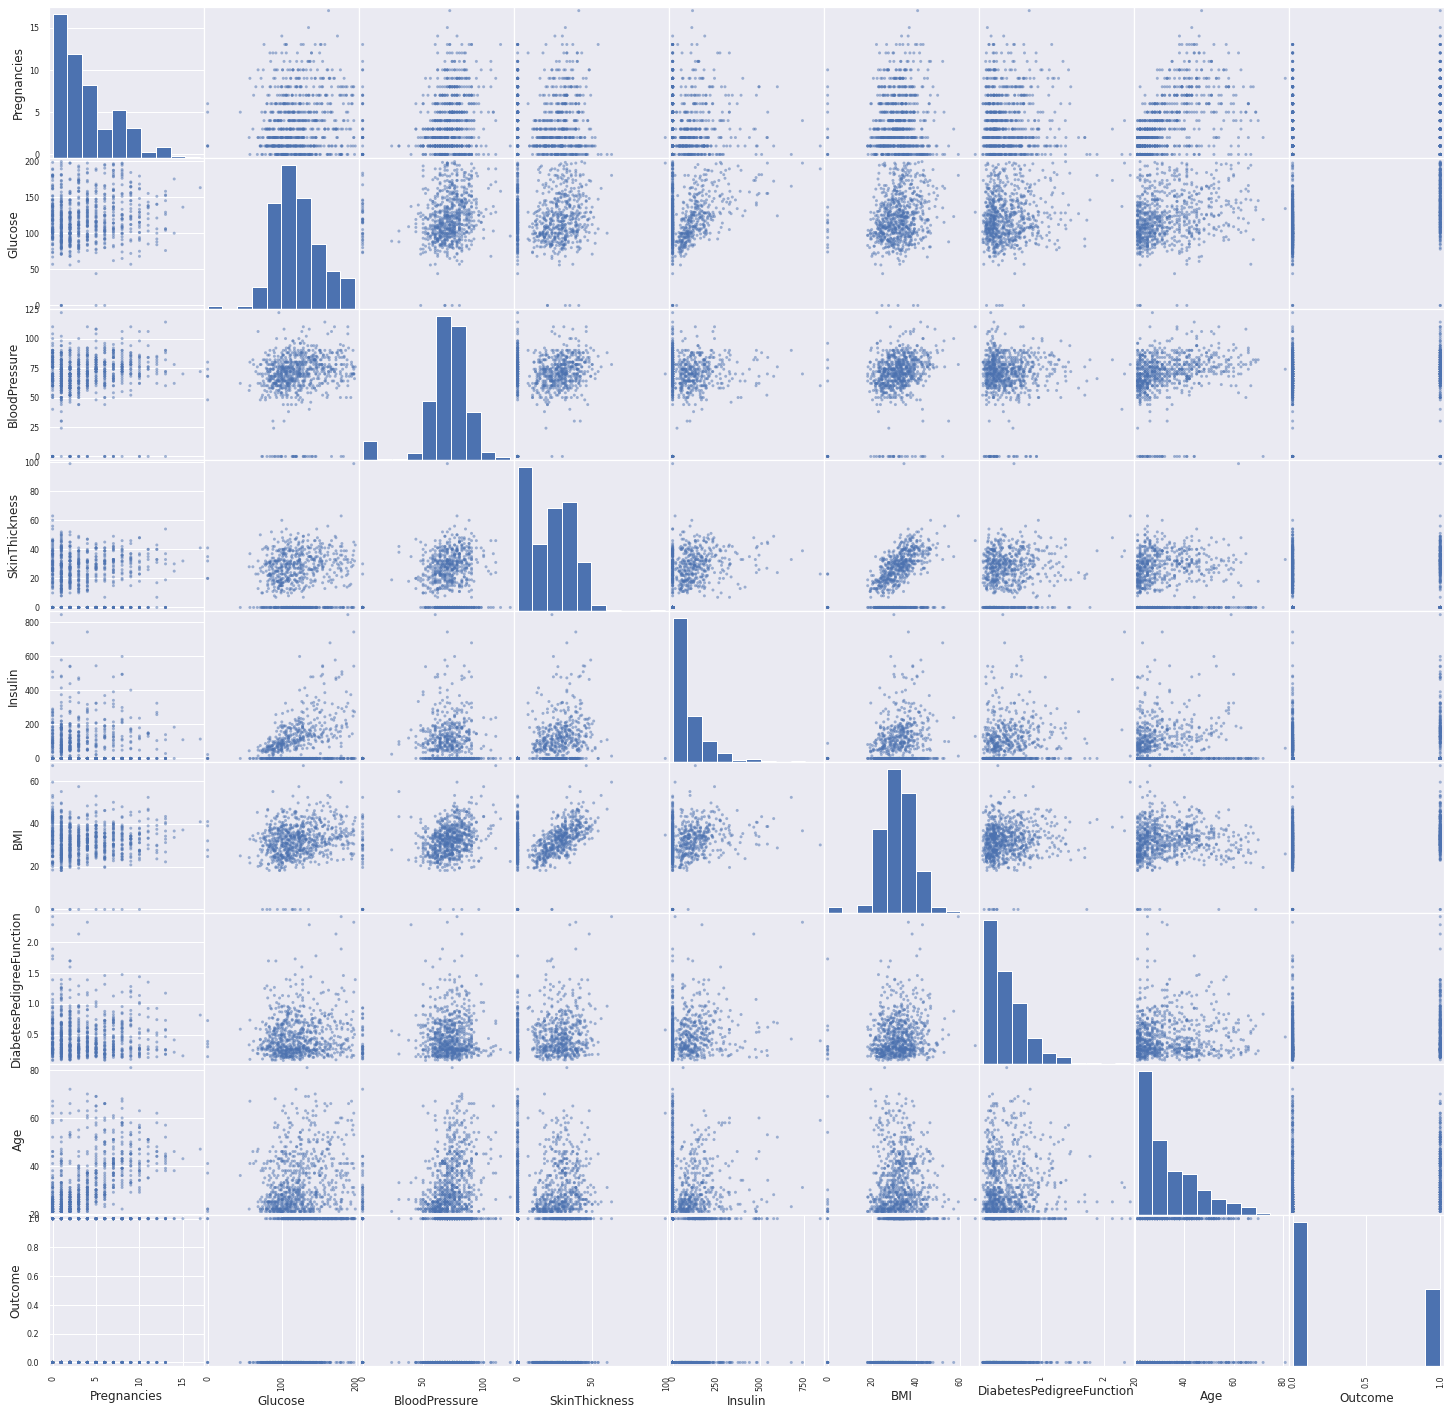

In [128]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes,figsize=(25,25))

**The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram to the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship(or lack thereof) between two variable**

Pair plot for clean data

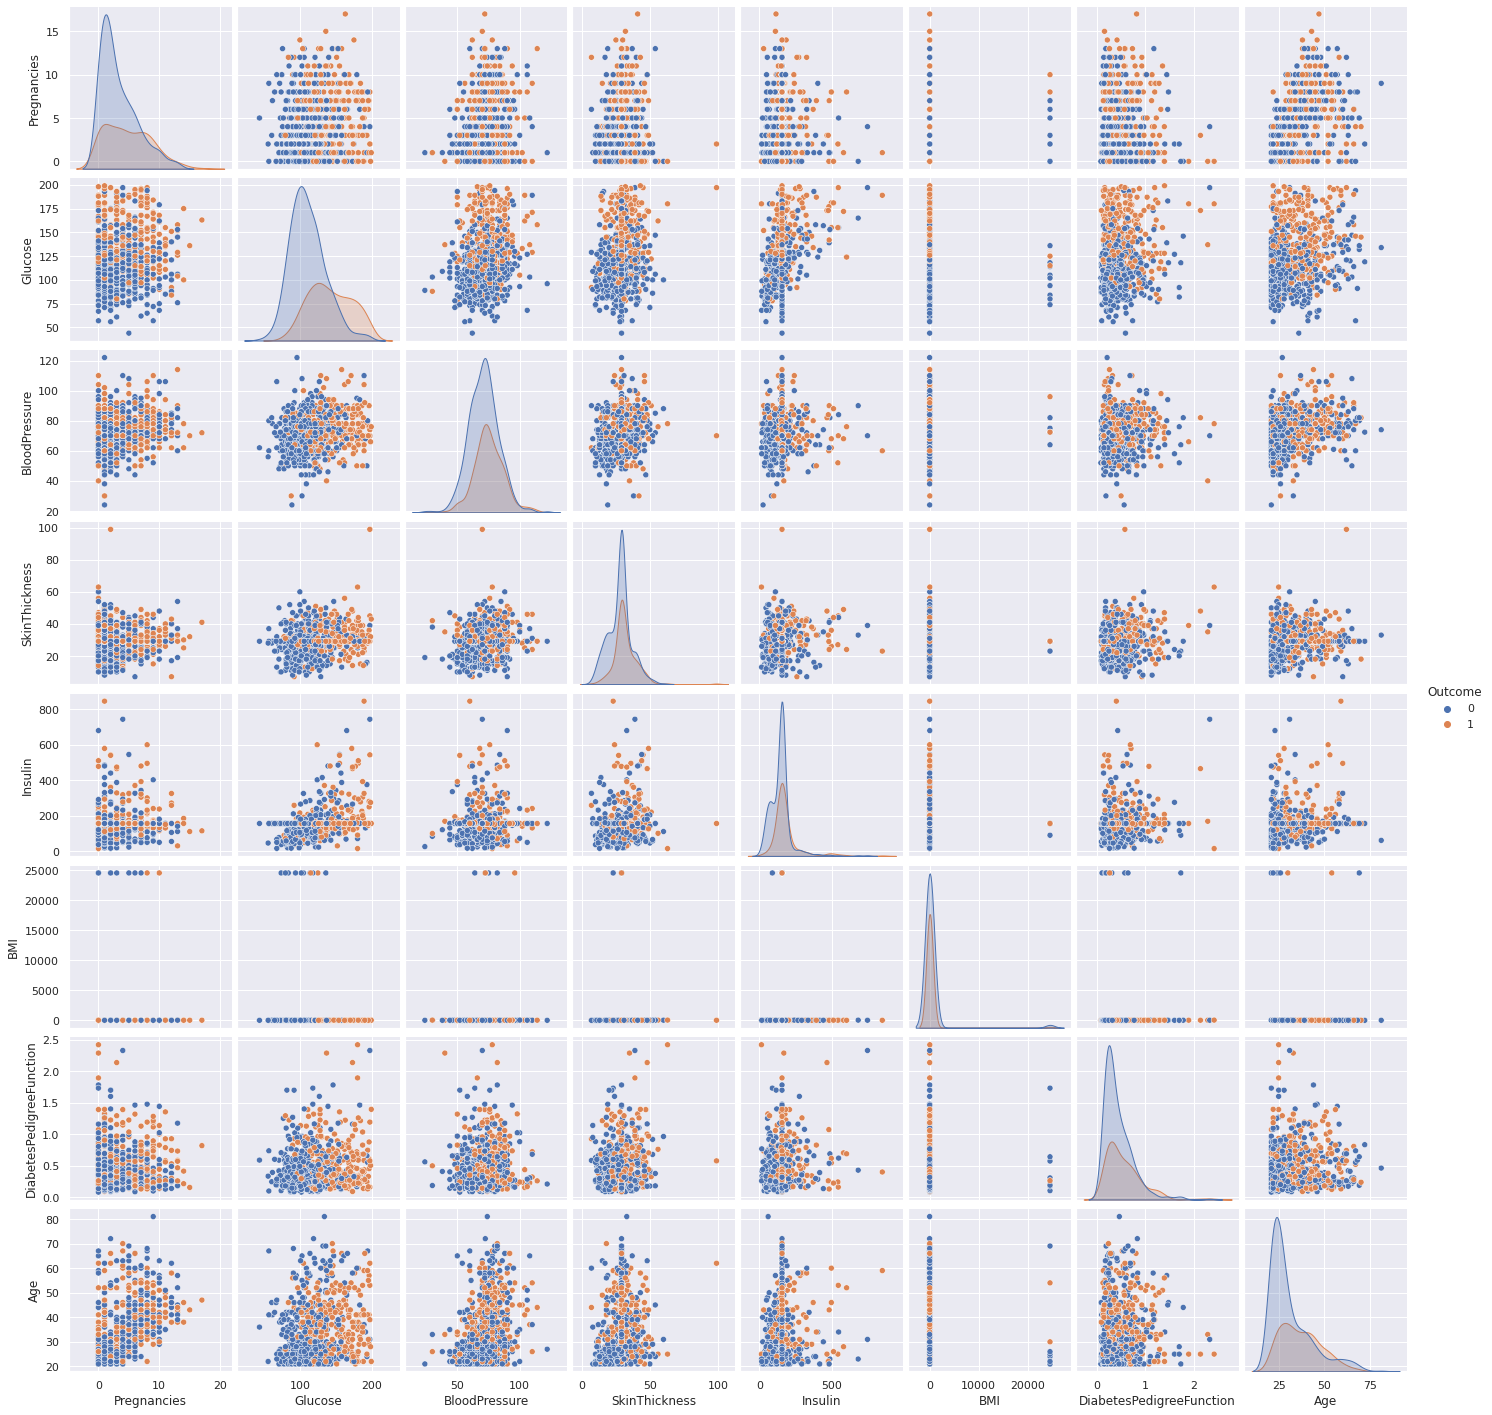

In [129]:
p=sns.pairplot(diabetes_copy,hue="Outcome")

**Pearson's Correlation Coefficient** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between - to +.  means that they are higly coorelated and means no correlation.

A heat mao is two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

**Heatmap for unclean data**

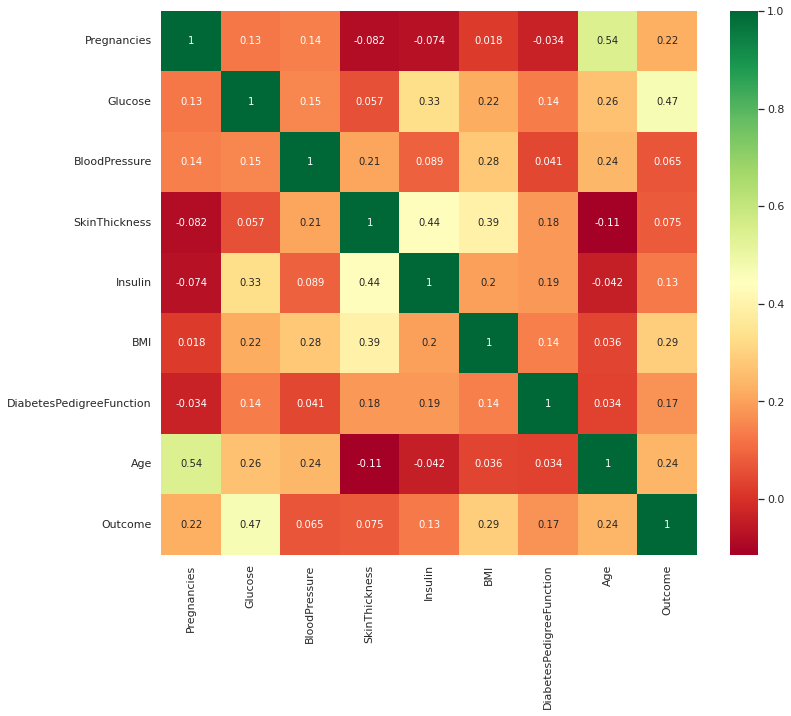

In [130]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes.corr(),annot=True,cmap="RdYlGn")

**Heatmap for clean data**

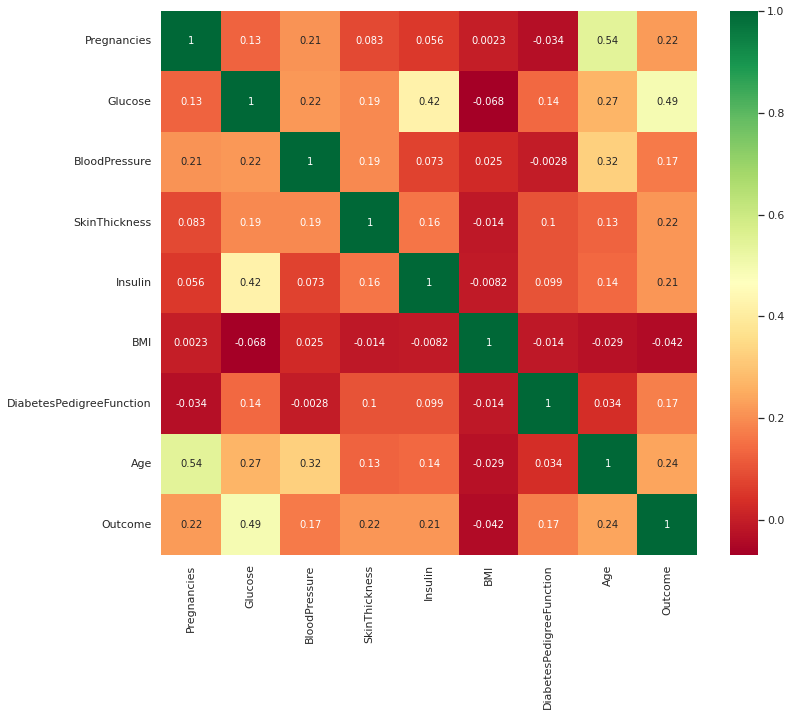

In [131]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_copy.corr(),annot=True,cmap="RdYlGn")

**Scaling Data** 
ata Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula: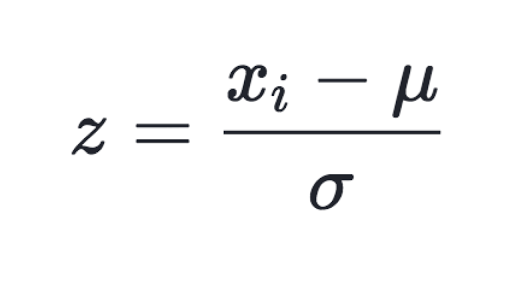

In [132]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(diabetes_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThinkness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [133]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThinkness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,-0.120153,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.122553,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-0.123685,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.122039,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,-0.116894,5.484909,-0.020496


In [134]:
y=diabetes_copy.Outcome

Why Scaling the data for KNN?
it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature compeletely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
test=[]
train=[]
for i in range(1, 15):
    model =KNeighborsClassifier(i)
    model.fit(X_train,Y_train)
    
    test.append(model.score(X_train,Y_train))
    train.append(model.score(X_test,Y_test))

In [137]:
max_train_score = max(train)
train_scores_ind = [i for i, v in enumerate(train) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 75.0 % and k = [9]


In [138]:
max_test_score = max(test)
test_scores_ind = [i for i, v in enumerate(test) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [1]


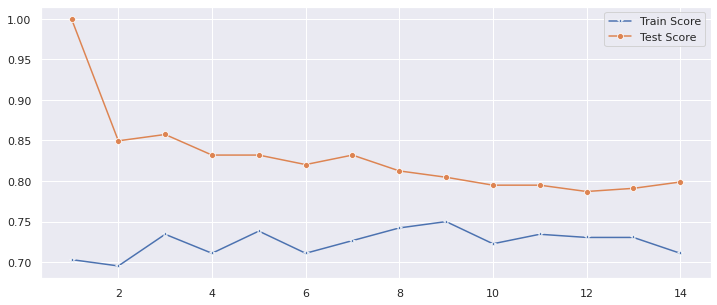

In [139]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test,marker='o',label='Test Score')

In [140]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.734375

In [144]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
c=confusion_matrix(Y_test,pred)
pd.crosstab(Y_test,pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,49,40,89
All,191,65,256


Text(0.5, 12.5, 'Predicted label')

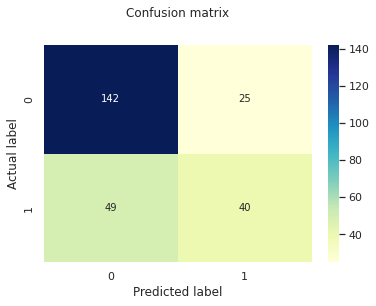

In [145]:
p = sns.heatmap(pd.DataFrame(c), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [147]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       167
           1       0.62      0.45      0.52        89

    accuracy                           0.71       256
   macro avg       0.68      0.65      0.66       256
weighted avg       0.70      0.71      0.70       256



In [148]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

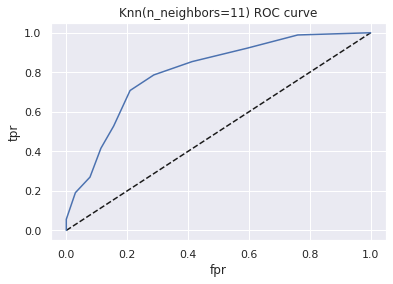

In [149]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [151]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.7991993541007871

In [152]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.756599609540786
Best Parameters: {'n_neighbors': 26}
